# How to use Seattle Open Data API endpoint


## Why

Because the city did a great job at cleaning, organizing, and publishing the data so it got me curious about what kind of data there are. Previously, I have been downloading the dataset and work with them using Excel or others, however, this soon became a challenge once the dataset is too large to download and I would rather to just query it.

Secondly, I don't have a reason to use SQL most of the time but [SoQL (Socrata Query Language)](https://dev.socrata.com/docs/queries/index.html) would give me a reason to brush up my SQL knowledge once in a while.

Lastly, writing and sharing my learnings is a way of practicing documentation and we all know how annoying it is to receive a new toy but without a manual.

In [70]:
from urllib import parse
from dotenv import dotenv_values
import requests

config = dotenv_values(".env")
dataset_id = "33kz-ixgy"

def get_api_endpoint_seattle(dataset_id:str, json_or_csv:str="json") -> str:
    domain = "data.seattle.gov"
    api_endpoint = f"https://{domain}/resource/{dataset_id}.{json_or_csv}"
    return api_endpoint

def soql_query(dataset_id:str, app_token:str, query:str=None):

    if query is None:
        query = "SELECT * LIMIT 5"

    api_endpoint = get_api_endpoint_seattle(dataset_id)
    param = parse.urlencode({"$$app_token": app_token, "$query": query}, safe='$+')
    param_to_dict = parse.parse_qs(param)

    result = api_endpoint + "?" + param

    return result

In [74]:
query = """
    select * limit 50
"""
url = soql_query(dataset_id, config["SEATTLE_APP_TOKEN"], query)

query = parse.urlparse(url).query
parse.parse_qs(query)

{'$$app_token': ['TOy7ZNxs0jyjxIsq4pPj3CVsK'],
 '$query': ['\n    select * limit 50\n']}

In [2]:
get_query_url(dataset_id, config["SEATTLE_APP_TOKEN"])

'https://data.seattle.gov/resource/33kz-ixgy.json?$$app_token=TOy7ZNxs0jyjxIsq4pPj3CVsK&$limit=3'

In [ ]:
from sodapy import Socrata
import pandas as pd

def get_df_sodapy(dataset_id, query):
    seattle_socrata_client = Socrata(
        domain = "data.seattle.gov",
        app_token = config["SEATTLE_APP_TOKEN"]
    )

    result = seattle_socrata_client.get(
        dataset_id, 
        query = query,
    )

    df = pd.DataFrame.from_records(result)
    return df

query = 'select * order by cad_event_original_time_queued desc limit 100'

get_df_sodapy(dataset_id, query)

,cad_event_number,cad_event_clearance_description,call_type,priority,initial_call_type,final_call_type,cad_event_original_time_queued,cad_event_arrived_time,dispatch_precinct,dispatch_sector,...,call_sign_dispatch_delay_time_s_,call_sign_response_time_s_,call_sign_at_scene_time,cad_event_first_response_time_s_,call_sign_in_service_time,call_type_indicator,dispatch_neighborhood,call_type_received_classification,dispatch_address,count_of_officers
0,2025000238102,ASSISTANCE RENDERED,911,2,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"ASSAULTS, OTHER",2025-08-18T23:57:11.000,2025-08-19T00:09:18.000,NORTH,NORA,...,312,727,2025-08-19T00:09:18.000,727,2025-08-19T04:17:20.000,DISPATCH,NORTHGATE,COMMUNITY_GENERATED,15XX BLOCK OF N 115 ST,2
1,2025000238101,ASSISTANCE RENDERED,911,4,FIREWORKS (NO HAZARD),MISCHIEF OR NUISANCE - GENERAL,2025-08-18T23:54:56.000,2025-08-19T00:01:29.000,SOUTH,ROBERT,...,59,393,2025-08-19T00:01:29.000,393,2025-08-19T00:11:59.000,DISPATCH,CLAREMONT/RAINIER VISTA,COMMUNITY_GENERATED,29 AV S / S ADAMS ST,1
2,2025000238100,NO POLICE ACTION POSSIBLE OR NECESSARY,"TELEPHONE OTHER, NOT 911",2,SERVICE - WELFARE CHECK,ASSIST PUBLIC - OTHER (NON-SPECIFIED),2025-08-18T23:54:43.000,2025-08-19T04:56:20.000,NORTH,NORA,...,18005,18097,2025-08-19T04:56:20.000,18097,2025-08-19T04:58:59.000,DISPATCH,NORTHGATE,COMMUNITY_GENERATED,11XX BLOCK OF N 94 ST,1
3,2025000238099,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,2,SERVICE - WELFARE CHECK,ASSIST PUBLIC - OTHER (NON-SPECIFIED),2025-08-18T23:52:24.000,2025-08-19T00:16:12.000,WEST,DAVID,...,1428,1428,2025-08-19T00:16:12.000,1428,2025-08-19T03:41:33.000,DISPATCH,SLU/CASCADE,COMMUNITY_GENERATED,4XX BLOCK OF FAIRVIEW AV N,2
4,2025000238098,NO POLICE ACTION POSSIBLE OR NECESSARY,911,1,SUICIDE - CRITICAL,ASSIST PUBLIC - OTHER (NON-SPECIFIED),2025-08-18T23:50:09.000,2025-08-18T23:56:39.000,NORTH,UNION,...,34,390,2025-08-18T23:56:39.000,390,2025-08-19T00:41:21.000,DISPATCH,SANDPOINT,COMMUNITY_GENERATED,62XX BLOCK OF 54 AV NE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025000238043,REPORT WRITTEN (NO ARREST),911,1,BURG - OCCUPIED RESD,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,2025-08-18T22:24:14.000,2025-08-18T22:28:09.000,NORTH,UNION,...,52,235,2025-08-18T22:28:09.000,235,2025-08-19T02:50:32.000,DISPATCH,UNIVERSITY,COMMUNITY_GENERATED,50XX BLOCK OF 17 AV NE,1
96,2025000238043,REPORT WRITTEN (NO ARREST),911,1,BURG - OCCUPIED RESD,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,2025-08-18T22:24:14.000,2025-08-18T22:28:09.000,NORTH,UNION,...,54,NaN,NaN,235,2025-08-18T22:38:42.000,DISPATCH,UNIVERSITY,COMMUNITY_GENERATED,50XX BLOCK OF 17 AV NE,2
97,2025000238042,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3,NUISANCE,DISTURBANCE - OTHER,2025-08-18T22:19:42.000,NaN,NORTH,UNION,...,18719,NaN,NaN,NaN,2025-08-19T03:32:39.000,DISPATCH,UNIVERSITY,COMMUNITY_GENERATED,41XX BLOCK OF BROOKLYN AV NE,2
98,2025000238041,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",4,NOISE - GENERAL,DISTURBANCE - NOISE RESIDENTIAL,2025-08-18T22:18:48.000,2025-08-19T00:57:34.000,NORTH,JOHN,...,9518,9526,2025-08-19T00:57:34.000,9526,2025-08-19T00:58:01.000,DISPATCH,BALLARD NORTH,COMMUNITY_GENERATED,13XX BLOCK OF NW 85 ST,1


In [ ]:
## SQL Summaries can be done here!

query = """
    select call_type, count(cad_event_number)
    group by call_type

"""

seattle_socrata_client = Socrata(
    domain = "data.seattle.gov",
    app_token = config["SEATTLE_APP_TOKEN"],
    timeout=60*60,
)

result = seattle_socrata_client.get(
    dataset_id, 
    query = query,
)

result

[{'call_type': '911', 'count_cad_event_number': '4933442'},
 {'call_type': 'ALARM CALL (NOT POLICE ALARM)',
  'count_cad_event_number': '351595'},
 {'call_type': 'HISTORY CALL (RETRO)', 'count_cad_event_number': '401'},
 {'call_type': 'IN PERSON COMPLAINT', 'count_cad_event_number': '130'},
 {'call_type': 'ONVIEW', 'count_cad_event_number': '2962775'},
 {'call_type': 'POLICE (VARDA) ALARM', 'count_cad_event_number': '371'},
 {'call_type': 'PROACTIVE (OFFICER INITIATED)',
  'count_cad_event_number': '583'},
 {'call_type': 'SCHEDULED EVENT (RECURRING)', 'count_cad_event_number': '169'},
 {'call_type': 'TELEPHONE OTHER, NOT 911',
  'count_cad_event_number': '2157095'},
 {'call_type': 'TEXT MESSAGE', 'count_cad_event_number': '3296'}]

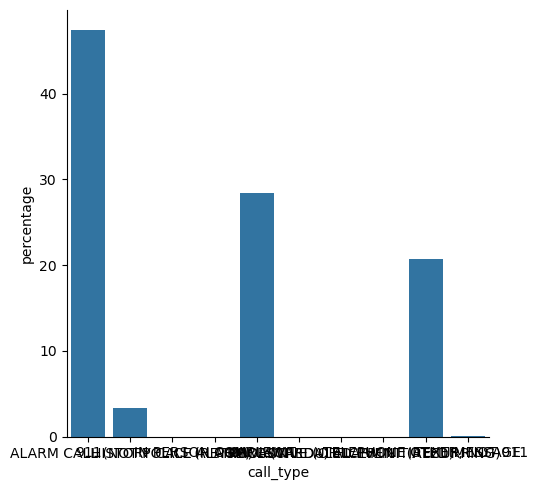

In [41]:
df = pd.DataFrame.from_records(result)
df = df.rename({"count_cad_event_number": "counts"}, axis=1)

df = df.astype(
    {
        "call_type": "category", 
        "counts": int,
    }
)

df["percentage"] = df.counts / df.counts.sum() * 100


import seaborn as sns

sns.catplot(
    df,
    x = 'call_type',
    y = 'percentage', 
    kind='bar'
)